In [1]:
from autosim.car import Car, specs
from helpers import kph_to_mps, mps_to_kph
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Зависимость силы, действующей на автомобиль от управляющего решения
def get_f_from_d(v, ds = np.arange(-1, 1, 0.01)):
    car = Car()
    fs = []
    for d in ds:
        force = car.get_force(d)
        fs.append(force(None, None, v))
    return fs

# Зависимость силы, действующей на автомобиль от управляющего решения
def get_a_from_d(v, ds = np.arange(-1, 1, 0.01)):
    car = Car()
    a = []
    for d in ds:
        force = car.get_force(d)
        a.append(force(None, None, v) / car.mass)
    return a

# График зависимости силы, действующей на автомобиль от управляющего решения
def draw_f_from_d(vs, ds = np.arange(-1, 1, 0.01)):
    for v in vs:
        plt.plot(ds, get_f_from_d(v, ds), label=f"v = {mps_to_kph(v):.0f} km/h")
    plt.title('Зависимость силы от управления при фиксированной скорости')
    plt.legend()
    plt.grid()
    plt.show()

# График зависимости ускорения, действующего на автомобиль от управляющего решения
def draw_a_from_d(vs, ds = np.arange(-1, 1, 0.01)):
    for v in vs:
        plt.plot(ds, get_a_from_d(v, ds), label=f"v = {mps_to_kph(v):.0f} km/h")
    plt.title('Зависимость ускорения от управления при фиксированной скорости')
    plt.legend()
    plt.grid()
    plt.show()

# Зависимость силы, действующей на автомобиль от скорости
def get_f_from_v(d, vs = np.arange(0, 120, 1)):
    car = Car()
    fs = []
    for v in vs:
        force = car.get_force(d)
        fs.append(force(None, None, v))
    return fs

# Зависимость силы, действующей на автомобиль от скорости
def get_a_from_v(d, vs = np.arange(0, 120, 1)):
    car = Car()
    a = []
    for v in vs:
        force = car.get_force(d)
        a.append(force(None, None, v) / car.mass)
    return a

# График зависимости силы, действующей на автомобиль от скорости
def draw_f_from_v(ds, vs = np.arange(0, 120, 1)):
    for d in ds:
        plt.plot(vs, get_f_from_v(d, vs), label=f"d = {d:.2f}")
    plt.title('Зависимость силы от скорости при фиксированном управлении')
    plt.legend()
    plt.grid()
    plt.show()

# График зависимости силы, действующей на автомобиль от скорости
def draw_a_from_v(ds, vs = np.arange(0, 120, 1)):
    for d in ds:
        plt.plot(vs, get_a_from_v(d, vs), label=f"d = {d:.2f}")
    plt.title('Зависимость ускорения от скорости при фиксированном управлении')
    plt.legend()
    plt.grid()
    plt.show()

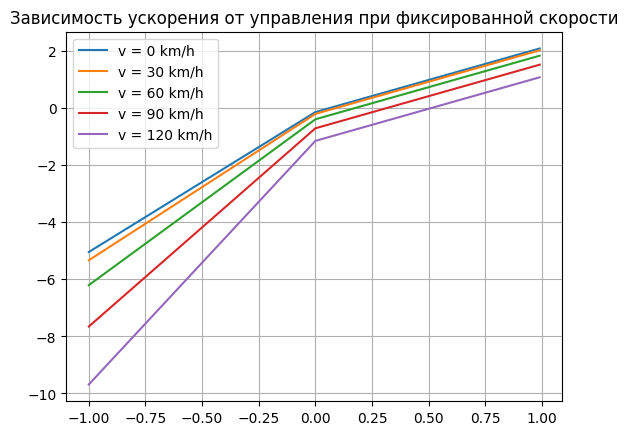

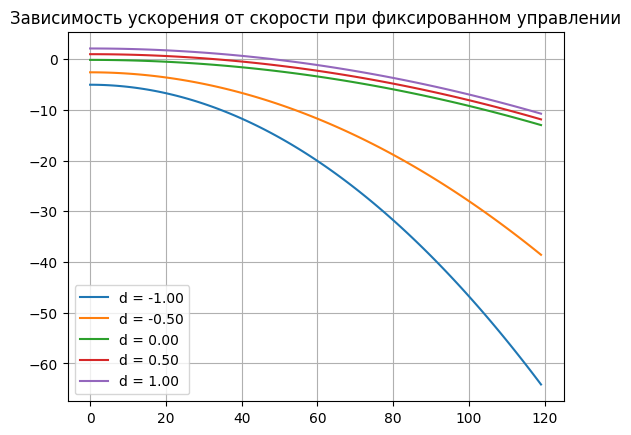

In [3]:
vs_kph = [0, 30, 60, 90, 120]
vs = [kph_to_mps(v) for v in vs_kph]
draw_a_from_d(vs)
ds = [-1, -0.5, 0, 0.5, 1]
draw_a_from_v(ds)

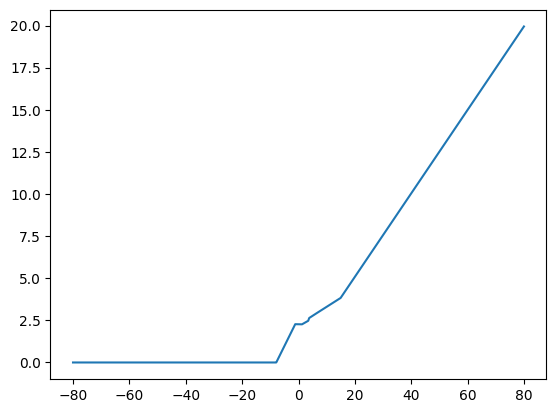

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return x if x > 0 else 0

def make_relu_composition_neuron(inputs):
    weights = np.random.uniform(low=-1, high=1, size=inputs)
    bias = np.random.uniform(low=-1, high=1, size=1)
    return lambda x: relu(np.sum(x * weights + bias[0]))

def make_relu_composition_layer(inputs, outputs):
    layer = [make_relu_composition_neuron(inputs) for _ in range(outputs)]
    return lambda x: np.array([neuron(x) for neuron in layer])

def make_relu_composition(layers: list[int]):
    network = []
    for i in range(len(layers) - 1):
        network += [make_relu_composition_layer(layers[i], layers[i + 1])]
    network += [make_relu_composition_layer(layers[-1], 1)]
    def lambdify(network):
        if len(network) == 1:
            return network[0]
        else:
            return lambda x: lambdify(network[1:])(network[0](x))

    return lambda x: np.sum(lambdify(network)(x))

relus = make_relu_composition([1, 3, 6])
xs = np.arange(-80, 80, 0.1)
ys = [relus(x) for x in xs]

plt.plot(xs, ys)

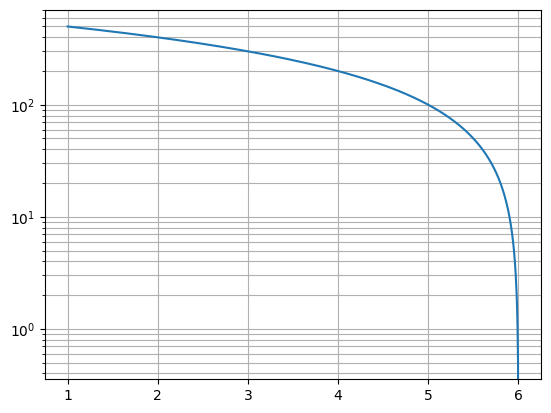

In [97]:
import matplotlib
import matplotlib.scale
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 6, 1000)
y = np.linspace(500, 0, 1000)
plt.yscale('log')
plt.plot(x, y)
plt.grid(which='both')

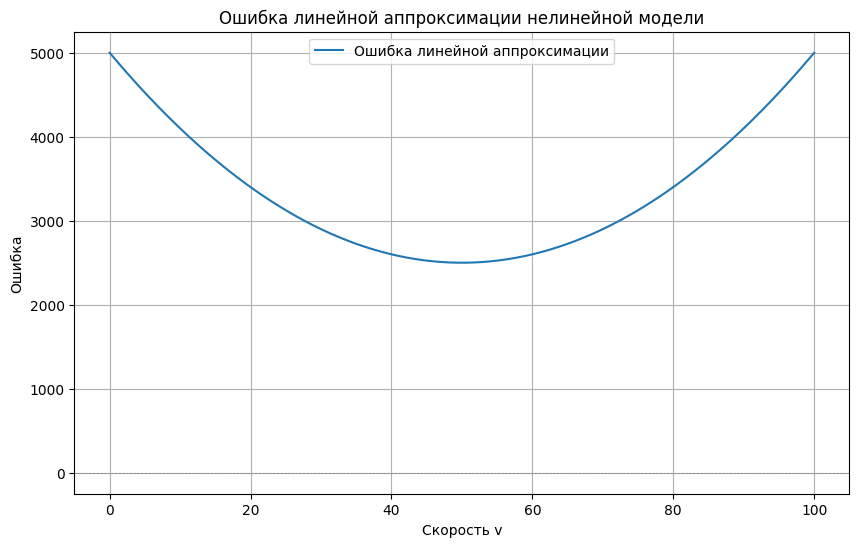

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры системы
k = 1.0  # Константа пропорциональности силы
m = 1.0  # Масса тела
v0 = 50.0  # Точка равновесия

# Определение функции ошибок
def non_linear_dvdt(v, k, m):
    return (k * v**2) / m

def linear_approx_dvdt(v, k, m, v0):
    return (2 * k * v0 / m) * (v - v0)

def error(v, k, m, v0):
    return non_linear_dvdt(v, k, m) - linear_approx_dvdt(v, k, m, v0)

# Диапазон скоростей
v_range = np.linspace(0, 100, 500)

# Вычисление ошибок
errors = error(v_range, k, m, v0)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(v_range, errors, label='Ошибка линейной аппроксимации')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Скорость v')
plt.ylabel('Ошибка')
plt.title('Ошибка линейной аппроксимации нелинейной модели')
plt.legend()
plt.grid(True)
plt.show()

800.0


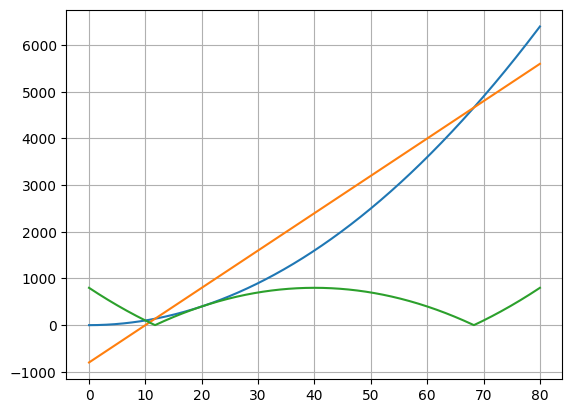

In [14]:
X = np.linspace(0, 80, 1000)
y1 = [x**2 for x in X]
y2 = [80*x - 800 for x in X]
y3 = [abs(_y1 - _y2) for _y1, _y2 in zip(y1, y2)]
plt.plot(X, y1)
plt.plot(X, y2)
plt.plot(X, y3)
plt.grid(which='both')
print(np.max(y3))

In [7]:
print(' '.join([str(x) for x in range(100)]))
print('---')
print(' '.join([str(x**2) for x in range(100)]))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
---
0 1 4 9 16 25 36 49 64 81 100 121 144 169 196 225 256 289 324 361 400 441 484 529 576 625 676 729 784 841 900 961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025 3136 3249 3364 3481 3600 3721 3844 3969 4096 4225 4356 4489 4624 4761 4900 5041 5184 5329 5476 5625 5776 5929 6084 6241 6400 6561 6724 6889 7056 7225 7396 7569 7744 7921 8100 8281 8464 8649 8836 9025 9216 9409 9604 9801


In [15]:
d = 0.5
d_pos = d if d > 0 else 0
d_neg = -d if d < 0 else 0

thrust = 750
v = 40
N = 11000
f = 0.015
front_area = 2.25
streamlining=0.36
mbreak=1.2

F_thrust = d_pos * thrust
F_frict = f * (1 + (v**2) / 1500) * N
F_break = d_neg * mbreak * N
F_air = front_area * streamlining * (v**2)

F_thrust, F_break, F_frict, F_air